In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

Using TensorFlow backend.


In [2]:
np.random.seed(0)

https://stackoverflow.com/questions/56119505/what-is-the-difference-between-np-random-seed-vs-random-state

In [3]:
n_pts = 500
X,Y = datasets.make_circles(n_samples= n_pts, random_state = 123, noise = 0.1, factor = 0.2)


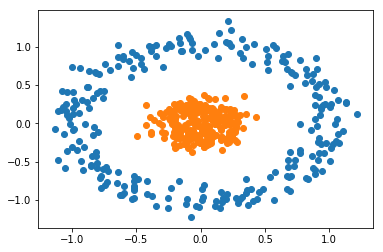

In [4]:
plt.scatter(X[Y==0,0],X[Y==0,1])
plt.scatter(X[Y==1,0],X[Y==1,1])
plt.show()

In [5]:
model = Sequential()
model.add(Dense(4,input_shape = (2,), activation = 'sigmoid')) # defined first hidden layer
model.add(Dense(1, activation = 'sigmoid'))   
model.compile(Adam(lr = 0.01),'binary_crossentropy',metrics = ['accuracy'])          


Instructions for updating:
Colocations handled automatically by placer.


In [6]:
h = model.fit(x=X,y=Y, verbose = 1, batch_size=20, epochs = 100, shuffle = 'true')


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
500/500 [==============================] - 0s 760us/step - loss: 0.6963 - acc: 0.5140
Epoch 2/100
500/500 [==============================] - 0s 60us/step - loss: 0.6938 - acc: 0.6180
Epoch 3/100
500/500 [==============================] - 0s 70us/step - loss: 0.6926 - acc: 0.5160
Epoch 4/100
500/500 [==============================] - 0s 70us/step - loss: 0.6916 - acc: 0.6760
Epoch 5/100
500/500 [==============================] - 0s 70us/step - loss: 0.6905 - acc: 0.6320
Epoch 6/100
500/500 [==============================] - 0s 70us/step - loss: 0.6890 - acc: 0.3640
Epoch 7/100
500/500 [==============================] - 0s 70us/step - loss: 0.6866 - acc: 0.6480
Epoch 8/100
500/500 [==============================] - 0s 70us/step - loss: 0.6839 - acc: 0.6700
Epoch 9/100
500/500 [==============================] - 0s 70us/step - loss: 0.6797 - acc: 0.7580
Epoch 10/100
500/500 [==============================] - 0s 70us/step - loss: 0

Text(0.5, 1.0, 'accuracy')

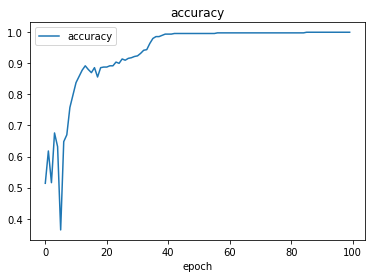

In [7]:
plt.plot(h.history['acc'])
plt.xlabel('epoch')
plt.legend(['accuracy'])
plt.title('accuracy')

Text(0.5, 1.0, 'loss')

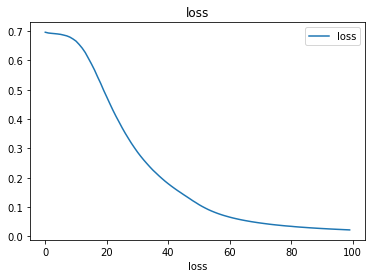

In [8]:
plt.plot(h.history['loss'])
plt.xlabel('loss')
plt.legend(['loss'])
plt.title('loss')

In [9]:
def plot_decision_boundary(X, Y, model):
    x_span = np.linspace(min(X[:,0])-0.25,max(X[:,0])+0.25,50)
    y_span = np.linspace(min(X[:,1])-0.25,max(X[:,1])+0.25,50)
    xx, yy = np.meshgrid(x_span,y_span)
    xx_,yy_ = xx.ravel(),yy.ravel() # converts the array into 1D array
    grid = np.c_[xx_,yy_]
    pred_func = model.predict(grid)
    z = pred_func.reshape(xx.shape)
    plt.contourf(xx,yy,z)

Prediction is :  [[0.02495426]]


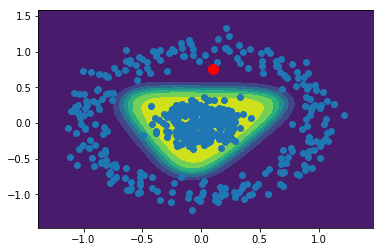

In [10]:
plot_decision_boundary(X, Y, model)
plt.scatter(X[:n_pts,0],X[:n_pts,1])
plt.scatter(X[n_pts:,0],X[n_pts:,1])

x,y = 0.1,0.75
point = np.array([[x,y]])
prediction = model.predict(point)
plt.plot([x],[y],marker='o',markersize = 10,color='red')
print('Prediction is : ',prediction)